In [1]:
import pandas as pd
import glob
import os


def read_csv_file(file_path):
    """
    Reads a CSV file and returns a DataFrame.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    pd.DataFrame: The DataFrame containing the CSV data.
    """
    try:
        df = pd.read_csv(file_path,skiprows=3)
        return df
    except Exception as e:
        print(f"Error reading the CSV file: {e}")
        return None

In [ ]:
# Get list of solar files
wind_files = glob.glob('Wind_202*.csv')
print("Found files:", wind_files)

# Read and combine all files
dfs = []
for file in wind_files:
    df = read_csv_file(file)
    if df is not None:
        dfs.append(df)
        print(f"Added {file} with shape {df.shape}")

# Combine all DataFrames
if dfs:
    combined_df = pd.concat(dfs, axis=0, ignore_index=True)
    print(f"\nCombined DataFrame shape: {combined_df.shape}")
    print("\nFirst few rows:")
    print(combined_df.head())
else:
    print("No valid DataFrames to combine")

# Make electicity from kWH to MWh 
combined_df['electricity'] = combined_df['electricity'] / 1000.0
combined_df.to_csv('combined_wind_data.csv', index=False)
print("Combined data saved to 'combined_wind_data.csv'")

Found files: ['Wind_2020.csv', 'Wind_2021.csv', 'Wind_2022.csv', 'Wind_2023.csv', 'Wind_2024.csv']
Added Wind_2020.csv with shape (8784, 3)
Added Wind_2021.csv with shape (8760, 3)
Added Wind_2022.csv with shape (8760, 3)
Added Wind_2023.csv with shape (8760, 3)
Added Wind_2024.csv with shape (8784, 3)

Combined DataFrame shape: (43848, 3)

First few rows:
               time        local_time  electricity
0  2020-01-01 00:00  2020-01-01 01:00    45981.797
1  2020-01-01 01:00  2020-01-01 02:00    43019.877
2  2020-01-01 02:00  2020-01-01 03:00    45243.552
3  2020-01-01 03:00  2020-01-01 04:00    45184.081
4  2020-01-01 04:00  2020-01-01 05:00    48896.189
Combined data saved to 'combined_wind_data.csv'


# Check Which Distributions fits Production Best (Hourly)

[04-06-2025 14:31:23] [distfit.distfit] [INFO] fit
[04-06-2025 14:31:23] [distfit.distfit] [INFO] transform
[04-06-2025 14:31:23] [distfit.distfit] [INFO] [norm      ] [0.00 sec] [RSS: 0.000652643] [loc=37.939 scale=25.327]
[04-06-2025 14:31:23] [distfit.distfit] [INFO] [expon     ] [0.00 sec] [RSS: 0.000705073] [loc=0.000 scale=37.939]
[04-06-2025 14:31:23] [distfit.distfit] [INFO] [pareto    ] [0.02 sec] [RSS: 0.000705073] [loc=-2147483648.000 scale=2147483648.000]
[04-06-2025 14:31:23] [distfit.distfit] [INFO] [dweibull  ] [0.22 sec] [RSS: 0.000698641] [loc=37.525 scale=23.176]
[04-06-2025 14:31:25] [distfit.distfit] [INFO] [t         ] [1.83 sec] [RSS: 0.000652677] [loc=37.939 scale=25.327]
[04-06-2025 14:31:26] [distfit.distfit] [INFO] [genextreme] [0.44 sec] [RSS: 0.000425991] [loc=26.087 scale=20.530]
[04-06-2025 14:31:26] [distfit.distfit] [INFO] [gamma     ] [0.19 sec] [RSS: 0.000225684] [loc=-0.320 scale=21.824]
[04-06-2025 14:31:26] [distfit.distfit] [INFO] [lognorm   ] [0.2

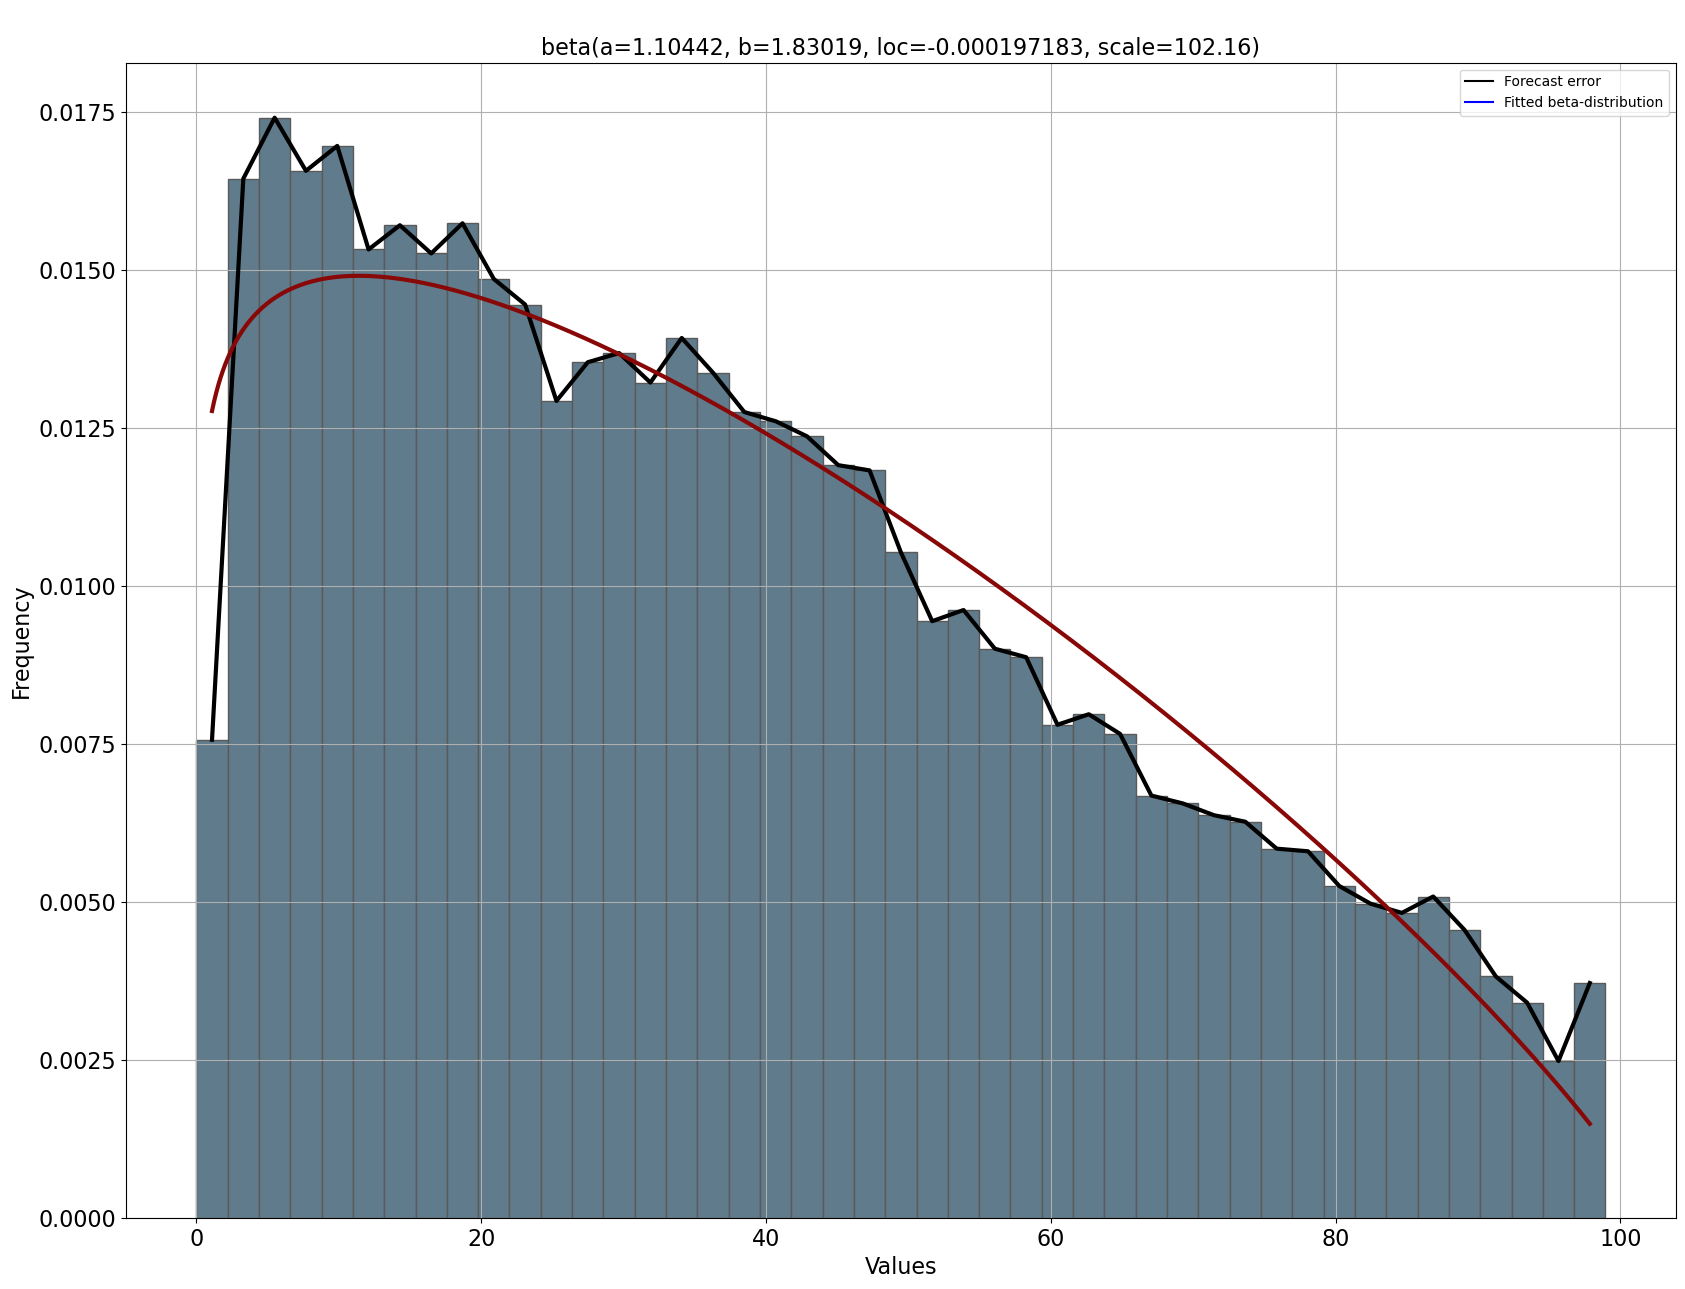

In [ ]:
from distfit import distfit
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

dist = distfit()


# Find best theoretical distribution for empirical data X
dist.fit_transform(combined_df['electricity'])
fig, ax = dist.plot()
ax.lines[-1].remove()
ax.lines[-1].remove()
l1 = Line2D([0], [0], color='black', label="Forecast error")
l2 = Line2D([0], [0], color='red', label="Fitted beta-distribution")
handles = [l1, l2]
ax.legend(handles=handles)

# Find Best Distriubtion for Yearly Data

In [ ]:
yearly_prod =combined_df['electricity']
yearly_prod.index = pd.to_datetime(combined_df['time'])
yearly_prod =  yearly_prod.resample('YE').sum() # Resample to yearly sum
print(f" Average Production {yearly_prod.mean()}, Volatility {yearly_prod.std()}")

 Avearge Production 332710.0074432, Volatility 15613.281301499608


[04-06-2025 14:49:21] [distfit.distfit] [INFO] fit
[04-06-2025 14:49:21] [distfit.distfit] [INFO] transform
[04-06-2025 14:49:21] [distfit.distfit] [INFO] [norm      ] [0.00 sec] [RSS: 2.04052e-09] [loc=332710.007 scale=13964.943]
[04-06-2025 14:49:21] [distfit.distfit] [INFO] [expon     ] [0.00 sec] [RSS: 3.2066e-09] [loc=307148.709 scale=25561.299]
[04-06-2025 14:49:21] [distfit.distfit] [INFO] [pareto    ] [0.00 sec] [RSS: 3.76121e-09] [loc=306887.961 scale=260.748]
[04-06-2025 14:49:21] [distfit.distfit] [INFO] [dweibull  ] [0.02 sec] [RSS: 1.10501e-09] [loc=339893.601 scale=15086.911]
[04-06-2025 14:49:21] [distfit.distfit] [INFO] [t         ] [0.12 sec] [RSS: 2.04031e-09] [loc=332712.002 scale=13962.305]
[04-06-2025 14:49:21] [distfit.distfit] [INFO] [genextreme] [0.18 sec] [RSS: 3.56036e-10] [loc=338122.899 scale=9582.592]
[04-06-2025 14:49:21] [distfit.distfit] [INFO] [gamma     ] [0.04 sec] [RSS: 2.19826e-09] [loc=153674.020 scale=1212.442]
[04-06-2025 14:49:21] [distfit.distf

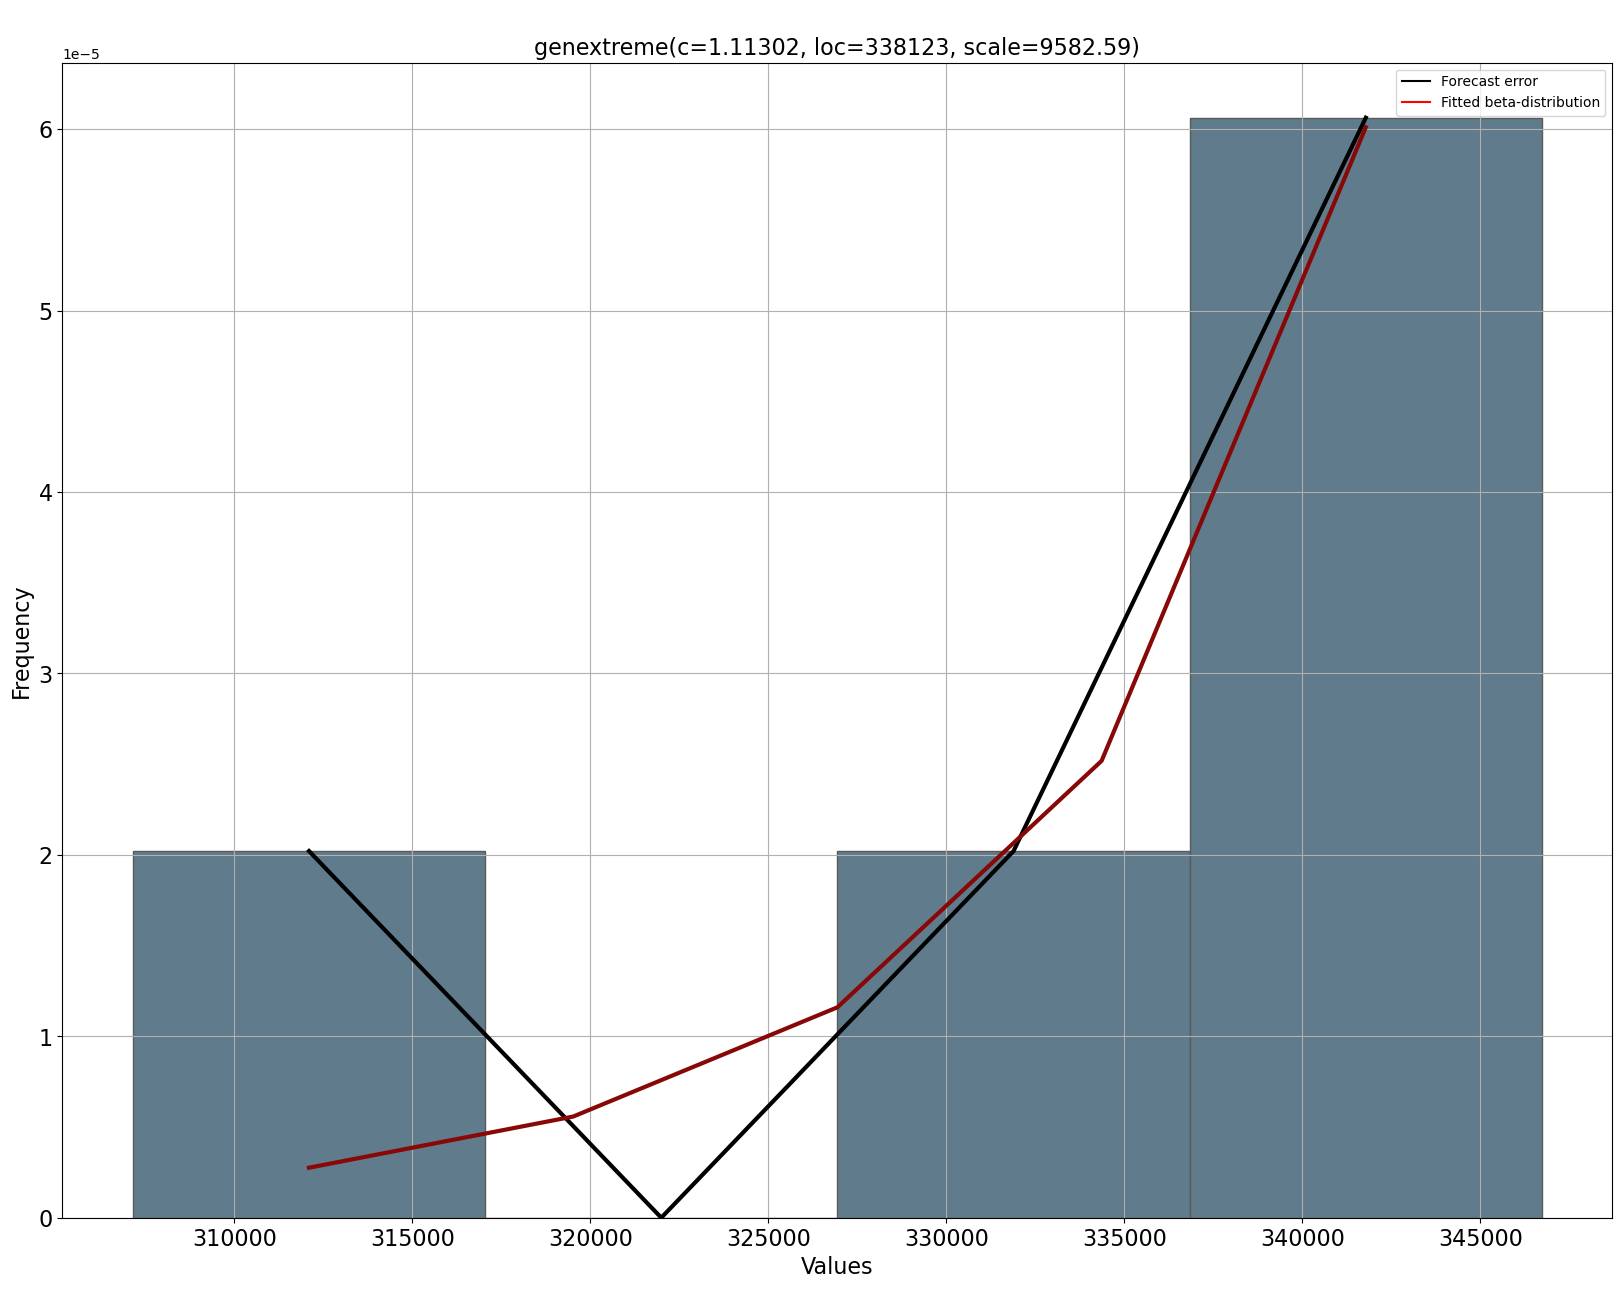

In [37]:
dist_yearly = distfit()
# Find best theoretical distribution for empirical data X
dist_yearly.fit_transform(yearly_prod)
fig, ax = dist_yearly.plot()
ax.lines[-1].remove()
ax.lines[-1].remove()
l1 = Line2D([0], [0], color='black', label="Forecast error")
l2 = Line2D([0], [0], color='red', label="Fitted beta-distribution")
handles = [l1, l2]
ax.legend(handles=handles)
